In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
pip install tensorflow

You should consider upgrading via the '/Users/lisajin/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow_datasets

You should consider upgrading via the '/Users/lisajin/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow_datasets as tfds

In [6]:
pip install tensorflow-cpu

You should consider upgrading via the '/Users/lisajin/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
>>> tf.add(1, 2).numpy()

>>> hello = tf.constant('Hello, TensorFlow!')
>>> hello.numpy()


b'Hello, TensorFlow!'

In [83]:
df = pd.read_csv("/Users/lisajin/Documents/scu/research material/X molecule/Bio-AI stuff/consolidated2.csv")
headers = np.array(df.columns)  # get headers
values = df.values  # numpy array of values
matrix = np.concatenate([[headers], values])  # append to the final matrix


data=pd.DataFrame(df).to_numpy()

In [84]:
print(data)

[[1.0000e+00 2.0000e+00 2.0000e+00 ... 4.3278e+10 2.0000e-01 1.0000e+00]
 [2.0000e+00 2.0000e+00 2.0000e+00 ... 4.3278e+10 2.0000e-01 2.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 2.7118e+10 2.0000e-01 3.0000e+00]
 ...
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 0.0000e+00 2.0000e-01 1.8300e+02]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 0.0000e+00 2.0000e-01 1.8400e+02]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 0.0000e+00 2.0000e-01 1.8500e+02]]


In [85]:
df1=df
df=df.drop('ID',axis=1)
vector=np.vectorize(np.float)
data=vector(df)
print(df)
print(df1)

     Number of proteins  Peptides  Unique peptides  Sequence coverage [%]  \
0                     1         2                2                   11.8   
1                     2         2                2                   11.8   
2                     1         1                1                    0.1   
3                     1         1                1                    1.9   
4                     1         1                1                    4.8   
..                  ...       ...              ...                    ...   
180                   1         1                1                    1.0   
181                   1         1                1                    3.0   
182                   1         1                1                    3.4   
183                   1         1                1                    1.7   
184                   1         1                1                    0.4   

     Unique sequence coverage [%]  Mol. weight [kDa]  Sequence length  \
0 

In [86]:
df.head()

,Number of proteins,Peptides,Unique peptides,Sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Intensity,locationweight
0,1,2,2,11.8,11.8,4007.00,68,68,0,26.8050,43278000000,0.2
1,2,2,2,11.8,11.8,4007.00,1195,1195,0,26.8050,43278000000,0.2
2,1,1,1,0.1,0.1,760.28,6993,6993,0,13.5360,27118000000,0.2
3,1,1,1,1.9,1.9,760.28,421,421,0,9.2509,10040000000,0.2
4,1,1,1,4.8,4.8,559.43,146,146,0,6.1686,9356900000,0.2


In [87]:
# column order in CSV file
column_names = ['Number of proteins', 'Peptides','Unique peptides', 'Sequence coverage [%]', 'Mol. weight [kDa]', 'Sequence length','Sequence lengths','Q-value','Score','Intensity','locationweight','predictions']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['Number of proteins', 'Peptides', 'Unique peptides', 'Sequence coverage [%]', 'Mol. weight [kDa]', 'Sequence length', 'Sequence lengths', 'Q-value', 'Score', 'Intensity', 'locationweight']
Label: predictions


In [88]:
df[['Number of proteins', 'Peptides','Unique peptides', 'Sequence coverage [%]', 'Mol. weight [kDa]', 'Sequence length','Sequence lengths','Q-value','Score','Intensity']

].describe()

,Number of proteins,Peptides,Unique peptides,Sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Intensity
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,1.005405,2.540541,2.486486,9.048108,111.450256,781.416216,781.416216,0.037838,42.089331,9.024703e+08
std,0.073521,2.684442,2.577301,9.144154,418.408632,2737.008361,2737.008361,0.191322,86.570472,4.997411e+09
min,1.000000,1.000000,1.000000,0.000000,8.045800,68.000000,68.000000,0.000000,-2.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,2.400000,33.738000,258.000000,258.000000,0.000000,6.542500,6.544800e+06
50%,1.000000,1.000000,1.000000,6.700000,47.094000,431.000000,431.000000,0.000000,12.638000,1.633000e+07
75%,1.000000,3.000000,3.000000,13.100000,69.883000,641.000000,641.000000,0.000000,26.236000,6.261300e+07
max,2.000000,16.000000,15.000000,54.900000,4007.000000,36026.000000,36026.000000,1.000000,323.310000,4.327800e+10


In [89]:
class_names = ['predictionYES', 'predictionNO']

In [90]:
dt=stats.zscore(df, axis=1)
#without locationweight and ID, THAT CAN BE FOUND IN dt1

In [91]:
print(dt)

[[-0.30151138 -0.30151138 -0.30151138 ... -0.30151137  3.31662479
  -0.30151138]
 [-0.30151139 -0.30151139 -0.30151139 ... -0.30151139  3.31662479
  -0.30151139]
 [-0.30151152 -0.30151152 -0.30151152 ... -0.30151152  3.31662479
  -0.30151152]
 ...
 [-0.469309   -0.469309   -0.469309   ... -0.40010547 -0.48243337
  -0.4798085 ]
 [-0.45079144 -0.45079144 -0.45079144 ... -0.43411225 -0.45414155
  -0.45347153]
 [-0.44763015 -0.44763015 -0.44763015 ... -0.44504785 -0.44815116
  -0.44804696]]


In [92]:
df

,Number of proteins,Peptides,Unique peptides,Sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Intensity,locationweight
0,1,2,2,11.8,11.8,4007.0000,68,68,0,26.8050,43278000000,0.2
1,2,2,2,11.8,11.8,4007.0000,1195,1195,0,26.8050,43278000000,0.2
2,1,1,1,0.1,0.1,760.2800,6993,6993,0,13.5360,27118000000,0.2
3,1,1,1,1.9,1.9,760.2800,421,421,0,9.2509,10040000000,0.2
4,1,1,1,4.8,4.8,559.4300,146,146,0,6.1686,9356900000,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
180,1,1,1,1.0,1.0,13.5750,1536,1536,0,6.5413,0,0.5
181,1,1,1,3.0,3.0,11.4460,201,201,0,6.3478,0,0.2
182,1,1,1,3.4,3.4,10.8300,207,207,0,6.2729,0,0.2
183,1,1,1,1.7,1.7,8.1435,803,803,0,5.9787,0,0.2


In [93]:
len(dt)

185

In [94]:
y= df.Score

In [95]:
x=df.drop('Score',axis=1)

In [96]:
neg, pos = np.bincount(df['Q-value'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total)) #this seven should be excluded since the Q-value is postive

Examples:
    Total: 185
    Positive: 7 (3.78% of total)



In [97]:
cleaned_df =df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Score')



0      26.8050
1      26.8050
2      13.5360
3       9.2509
4       6.1686
        ...   
180     6.5413
181     6.3478
182     6.2729
183     5.9787
184     5.9564
Name: Score, Length: 185, dtype: float64

In [98]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Number of proteins'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Number of proteins'))
test_labels = np.array(test_df.pop('Number of proteins'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [99]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (118,)
Validation labels shape: (30,)
Test labels shape: (37,)
Training features shape: (118, 10)
Validation features shape: (30, 10)
Test features shape: (37, 10)


In [100]:
x

,Number of proteins,Peptides,Unique peptides,Sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Intensity,locationweight
0,1,2,2,11.8,11.8,4007.0000,68,68,0,43278000000,0.2
1,2,2,2,11.8,11.8,4007.0000,1195,1195,0,43278000000,0.2
2,1,1,1,0.1,0.1,760.2800,6993,6993,0,27118000000,0.2
3,1,1,1,1.9,1.9,760.2800,421,421,0,10040000000,0.2
4,1,1,1,4.8,4.8,559.4300,146,146,0,9356900000,0.2
...,...,...,...,...,...,...,...,...,...,...,...
180,1,1,1,1.0,1.0,13.5750,1536,1536,0,0,0.5
181,1,1,1,3.0,3.0,11.4460,201,201,0,0,0.2
182,1,1,1,3.4,3.4,10.8300,207,207,0,0,0.2
183,1,1,1,1.7,1.7,8.1435,803,803,0,0,0.2


In [101]:
y.head()

0    26.8050
1    26.8050
2    13.5360
3     9.2509
4     6.1686
Name: Score, dtype: float64

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [104]:
print("shape of original dataset :", df.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (185, 12)
shape of input - training set (148, 11)
shape of output - training set (148,)
shape of input - testing set (37, 11)
shape of output - testing set (37,)


In [105]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          11, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

#model = tf.keras.Sequential([
  #tf.keras.layers.Dense(324, activation=tf.nn.relu, input_shape=(12,)),  # input shape required
  #tf.keras.layers.Dense(324, activation=tf.nn.relu), #relu is a function, like sigmoid function used previously
  #tf.keras.layers.Dense(324)
#])
#with many tests, the neurons pass layer set to 128 could predict the best results

In [106]:
model = make_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 11)                121       
_________________________________________________________________
dropout_5 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 12        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


/Users/lisajin/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [107]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [108]:
model = make_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 11)                121       
_________________________________________________________________
dropout_6 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 12        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_squared_error'])
             

In [110]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)



In [111]:
model.predict(train_features[:5]) 

array([[0.37692082],
       [0.3411661 ],
       [0.41324756],
       [0.37704486],
       [0.5277435 ]], dtype=float32)

In [112]:
predictions = model(train_features)
print(predictions)
#len(predictions) 

tf.Tensor(
[[0.37692082]
 [0.3411661 ]
 [0.41324756]
 [0.37704486]
 [0.5277435 ]
 [0.6640816 ]
 [0.43951893]
 [0.50486517]
 [0.35839346]
 [0.49329606]
 [0.48179814]
 [0.4615299 ]
 [0.5064199 ]
 [0.37017423]
 [0.40631354]
 [0.45985523]
 [0.5160336 ]
 [0.3595533 ]
 [0.50695854]
 [0.48769838]
 [0.27334267]
 [0.512318  ]
 [0.26467037]
 [0.37704486]
 [0.40664274]
 [0.4421288 ]
 [0.4821353 ]
 [0.43835497]
 [0.45379236]
 [0.5121621 ]
 [0.55260545]
 [0.53986937]
 [0.6612898 ]
 [0.7242203 ]
 [0.5196395 ]
 [0.43392906]
 [0.2857101 ]
 [0.7189276 ]
 [0.492895  ]
 [0.47438034]
 [0.934957  ]
 [0.48700327]
 [0.50133896]
 [0.28493583]
 [0.56767094]
 [0.708399  ]
 [0.5072146 ]
 [0.28537434]
 [0.45377594]
 [0.36627   ]
 [0.5281117 ]
 [0.40631354]
 [0.4800306 ]
 [0.5865532 ]
 [0.6486315 ]
 [0.50618196]
 [0.5008455 ]
 [0.457729  ]
 [0.3835983 ]
 [0.28892052]
 [0.5041683 ]
 [0.5093157 ]
 [0.40631354]
 [0.49847782]
 [0.44808018]
 [0.4348218 ]
 [0.82940686]
 [0.3779397 ]
 [0.7490149 ]
 [0.5074805 ]
 [0.17034

In [113]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
#print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [114]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0])) #initial loss

Loss: 0.3103


In [115]:
#the following cells are to test the trainining models and class weights. but since our data is very clean,
#stop here is fine


In [116]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [117]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [118]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [119]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

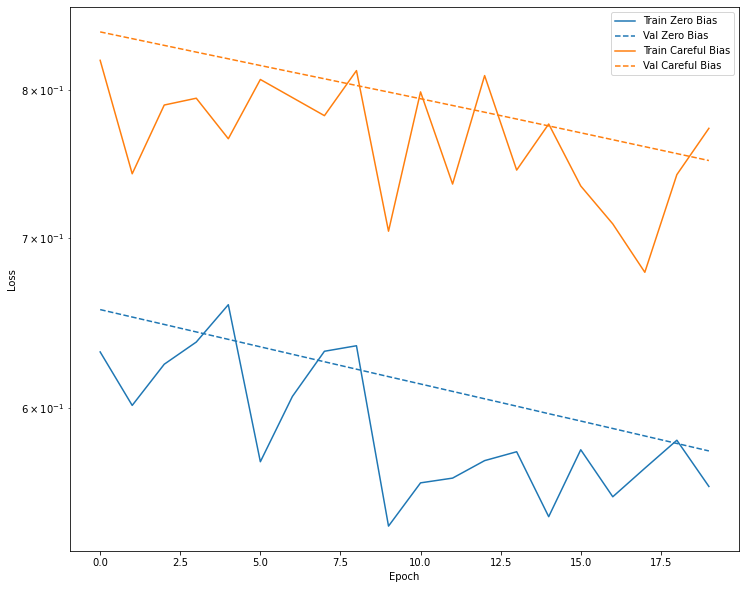

In [120]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)
plt.legend()

In [121]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.8614 - tp: 47.0000 - fp: 0.0000e+00 - tn: 0.0000e+00 - fn: 101.0000 - accuracy: 0.3176 - precision: 1.0000 - recall: 0.3176 - auc: 0.0000e+00 - prc: 1.0000 - val_loss: 0.8432 - val_tp: 11.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 19.0000 - val_accuracy: 0.3667 - val_precision: 1.0000 - val_recall: 0.3667 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7628 - tp: 43.0000 - fp: 0.0000e+00 - tn: 0.0000e+00 - fn: 75.0000 - accuracy: 0.3559 - precision: 1.0000 - recall: 0.3644 - auc: 0.0000e+00 - prc: 1.0000 - val_loss: 0.8380 - val_tp: 12.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 18.0000 - val_accuracy: 0.4000 - val_precision: 1.0000 - val_recall: 0.4000 - val_auc: 0.0000e+00 - val_prc: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.8472 - tp: 42.0000 - fp: 0.0000e+00 - tn: 0.0000e+00 - fn: 

In [122]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()



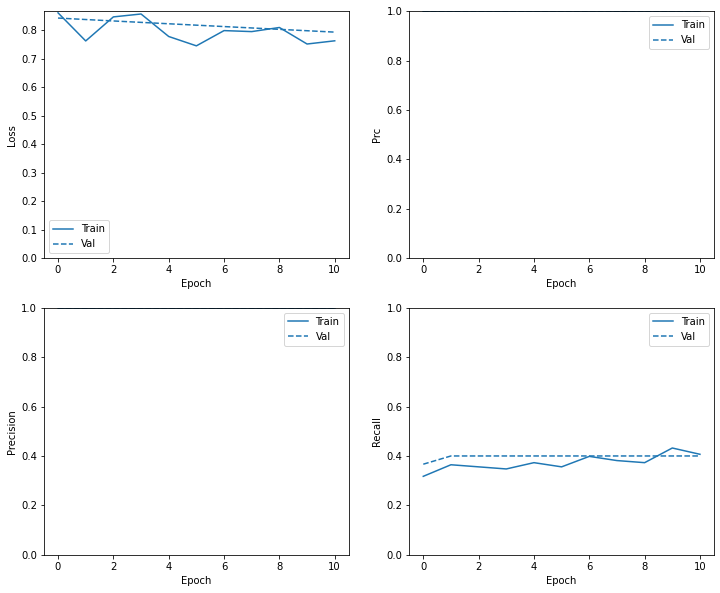

In [123]:
plot_metrics(baseline_history)

In [124]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [125]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [126]:
#the accuracy using MSE is almost 1 and the loss is very small, only 0.138, comparing to the training model, the loss is 
#very close, so the model looks good
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

#plot_cm(test_labels, test_predictions_baseline)



loss :  0.8631452322006226
tp :  8.0
fp :  0.0
tn :  0.0
fn :  29.0
accuracy :  0.21621622145175934
precision :  1.0
recall :  0.21621622145175934
auc :  0.0
prc :  1.0



In [127]:
print(predictions)

tf.Tensor(
[[0.37692082]
 [0.3411661 ]
 [0.41324756]
 [0.37704486]
 [0.5277435 ]
 [0.6640816 ]
 [0.43951893]
 [0.50486517]
 [0.35839346]
 [0.49329606]
 [0.48179814]
 [0.4615299 ]
 [0.5064199 ]
 [0.37017423]
 [0.40631354]
 [0.45985523]
 [0.5160336 ]
 [0.3595533 ]
 [0.50695854]
 [0.48769838]
 [0.27334267]
 [0.512318  ]
 [0.26467037]
 [0.37704486]
 [0.40664274]
 [0.4421288 ]
 [0.4821353 ]
 [0.43835497]
 [0.45379236]
 [0.5121621 ]
 [0.55260545]
 [0.53986937]
 [0.6612898 ]
 [0.7242203 ]
 [0.5196395 ]
 [0.43392906]
 [0.2857101 ]
 [0.7189276 ]
 [0.492895  ]
 [0.47438034]
 [0.934957  ]
 [0.48700327]
 [0.50133896]
 [0.28493583]
 [0.56767094]
 [0.708399  ]
 [0.5072146 ]
 [0.28537434]
 [0.45377594]
 [0.36627   ]
 [0.5281117 ]
 [0.40631354]
 [0.4800306 ]
 [0.5865532 ]
 [0.6486315 ]
 [0.50618196]
 [0.5008455 ]
 [0.457729  ]
 [0.3835983 ]
 [0.28892052]
 [0.5041683 ]
 [0.5093157 ]
 [0.40631354]
 [0.49847782]
 [0.44808018]
 [0.4348218 ]
 [0.82940686]
 [0.3779397 ]
 [0.7490149 ]
 [0.5074805 ]
 [0.17034

In [128]:
result=model.trainable_variables

In [129]:
varaible_weights=result[1]

In [130]:
print(result[1])

<tf.Variable 'dense_18/bias:0' shape=(11,) dtype=float32, numpy=
array([-0.00099904,  0.00099998, -0.00099995, -0.00099997,  0.00099998,
        0.00099996,  0.0009999 ,  0.00099996, -0.00099992,  0.00099996,
       -0.00099993], dtype=float32)>


In [131]:
print(model.trainable_variables) #return the Weights of the Model as shown below:

[<tf.Variable 'dense_18/kernel:0' shape=(10, 11) dtype=float32, numpy=
array([[ 0.09120695,  0.09724765,  0.05302089, -0.21144277, -0.09250964,
        -0.13113606,  0.5068276 ,  0.4363784 ,  0.28084773, -0.36760184,
        -0.39666384],
       [-0.0572604 , -0.11576438,  0.38350797, -0.1005007 , -0.19959804,
         0.31837958, -0.33200973, -0.46784818,  0.05180294,  0.4300997 ,
         0.43980467],
       [-0.26181102, -0.25355807,  0.268559  ,  0.04569562,  0.23803161,
         0.06955449,  0.2268567 ,  0.22822593, -0.21316537, -0.36791664,
         0.23877168],
       [-0.1782616 ,  0.31465876,  0.21142635,  0.5334573 , -0.25728175,
        -0.37653884, -0.05889381, -0.04322632,  0.45100802, -0.02365763,
        -0.25171003],
       [-0.0036908 , -0.27290085,  0.3488935 , -0.46344897, -0.33696142,
        -0.2087696 ,  0.10587928, -0.2349677 , -0.38212344,  0.27190876,
        -0.04615633],
       [ 0.15637268,  0.02795349, -0.22048955,  0.2919995 ,  0.5057512 ,
         0.36283

In [132]:
#the following will be visited when we have more time

In [133]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [134]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.52
Weight for class 1: 13.21


In [135]:
resampled_steps_per_epoch = np.ceil(93.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

9.0

In [136]:
for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.sigmoid(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))
#the results shows that after training, there are 118 out of 184 proteins likely to be the X molecule, it makes sense
#since our data is obtained from the corss-linking, most of the proteins should be targets anyway
#needs to find out a way to nail down top 10 target

Example 0 prediction: predictionYES (59.3%)
Example 1 prediction: predictionYES (58.4%)
Example 2 prediction: predictionYES (60.2%)
Example 3 prediction: predictionYES (59.3%)
Example 4 prediction: predictionYES (62.9%)
Example 5 prediction: predictionYES (66.0%)
Example 6 prediction: predictionYES (60.8%)
Example 7 prediction: predictionYES (62.4%)
Example 8 prediction: predictionYES (58.9%)
Example 9 prediction: predictionYES (62.1%)
Example 10 prediction: predictionYES (61.8%)
Example 11 prediction: predictionYES (61.3%)
Example 12 prediction: predictionYES (62.4%)
Example 13 prediction: predictionYES (59.2%)
Example 14 prediction: predictionYES (60.0%)
Example 15 prediction: predictionYES (61.3%)
Example 16 prediction: predictionYES (62.6%)
Example 17 prediction: predictionYES (58.9%)
Example 18 prediction: predictionYES (62.4%)
Example 19 prediction: predictionYES (62.0%)
Example 20 prediction: predictionYES (56.8%)
Example 21 prediction: predictionYES (62.5%)
Example 22 predictio

In [137]:

#now after so many trainings, we get relatively accurate weights for each variables, we need to give a ranking system 
#for the current dataset, and because we know for a fact that plasma membrane is the most likely location, we decide 
#to weigh a lot on the plasma membrane

In [138]:
#since every time we run the model, the weight changes a little bit, we record one of the results
#<tf.Variable 'dense_158/bias:0' shape=(11,) dtype=float32, numpy=
#array([ [-0.00099995, -0.00099988, -0.00099898, -0.00099985, -0.00099989,
        #0.00099962, -0.00099974, -0.00099988, -0.00099991,  0.00099988,
        #0.00099996], dtype=float32)>

In [139]:
general_recorded_weight=varaible_weights

In [140]:
recorded_weight=[-0.00099995, -0.00099988, -0.00099898, -0.00099985, -0.00099989,
        0.00099962, -0.00099974, -0.00099988, -0.00099991,  0.00099988,
        0.00099996]
#for the location weight, we manually program it to 50, #12 weights for the variables

In [141]:
df1

,Number of proteins,Peptides,Unique peptides,Sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Intensity,locationweight,ID
0,1,2,2,11.8,11.8,4007.0000,68,68,0,26.8050,43278000000,0.2,1
1,2,2,2,11.8,11.8,4007.0000,1195,1195,0,26.8050,43278000000,0.2,2
2,1,1,1,0.1,0.1,760.2800,6993,6993,0,13.5360,27118000000,0.2,3
3,1,1,1,1.9,1.9,760.2800,421,421,0,9.2509,10040000000,0.2,4
4,1,1,1,4.8,4.8,559.4300,146,146,0,6.1686,9356900000,0.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,1,1,1,1.0,1.0,13.5750,1536,1536,0,6.5413,0,0.5,181
181,1,1,1,3.0,3.0,11.4460,201,201,0,6.3478,0,0.2,182
182,1,1,1,3.4,3.4,10.8300,207,207,0,6.2729,0,0.2,183
183,1,1,1,1.7,1.7,8.1435,803,803,0,5.9787,0,0.2,184


In [142]:
data1=pd.DataFrame(df1).to_numpy()

In [143]:
dt

array([[-0.30151138, -0.30151138, -0.30151138, ..., -0.30151137,
         3.31662479, -0.30151138],
       [-0.30151139, -0.30151139, -0.30151139, ..., -0.30151139,
         3.31662479, -0.30151139],
       [-0.30151152, -0.30151152, -0.30151152, ..., -0.30151152,
         3.31662479, -0.30151152],
       ...,
       [-0.469309  , -0.469309  , -0.469309  , ..., -0.40010547,
        -0.48243337, -0.4798085 ],
       [-0.45079144, -0.45079144, -0.45079144, ..., -0.43411225,
        -0.45414155, -0.45347153],
       [-0.44763015, -0.44763015, -0.44763015, ..., -0.44504785,
        -0.44815116, -0.44804696]])

In [144]:
data1

array([[1.0000e+00, 2.0000e+00, 2.0000e+00, ..., 4.3278e+10, 2.0000e-01,
        1.0000e+00],
       [2.0000e+00, 2.0000e+00, 2.0000e+00, ..., 4.3278e+10, 2.0000e-01,
        2.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.7118e+10, 2.0000e-01,
        3.0000e+00],
       ...,
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.0000e-01,
        1.8300e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.0000e-01,
        1.8400e+02],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.0000e-01,
        1.8500e+02]])

In [145]:
weight_data=data1[:][:,-2]

In [146]:
ID=data1[:][:,-1]

In [147]:
print(ID)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185.]


In [148]:
location_weight=50*weight_data
len(location_weight)

185

In [149]:
dt[184,:]

array([-0.44763015, -0.44763015, -0.44763015, -0.44794276, -0.44794276,
       -0.44395926,  2.23606618,  2.23606618, -0.44815116, -0.44504785,
       -0.44815116, -0.44804696])

In [150]:
final=recorded_weight*dt[:,0:11]
print(final)
len(final)

[[ 0.0003015   0.00030148  0.0003012  ...  0.00030148 -0.00030148
   0.00331649]
 [ 0.0003015   0.00030148  0.0003012  ...  0.00030148 -0.00030148
   0.00331649]
 [ 0.0003015   0.00030148  0.0003012  ...  0.00030148 -0.00030148
   0.00331649]
 ...
 [ 0.00046929  0.00046925  0.00046883 ...  0.00048239 -0.00040006
  -0.00048241]
 [ 0.00045077  0.00045074  0.00045033 ...  0.0004541  -0.00043406
  -0.00045412]
 [ 0.00044761  0.00044758  0.00044717 ...  0.00044811 -0.00044499
  -0.00044813]]


185

In [151]:
gen_final=general_recorded_weight*dt[:,0:11]
print(gen_final)
len(gen_final)

tf.Tensor(
[[ 0.00030122 -0.00030151  0.0003015  ...  0.00030149 -0.0003015
  -0.00331639]
 [ 0.00030122 -0.00030151  0.0003015  ...  0.00030149 -0.0003015
  -0.00331639]
 [ 0.00030122 -0.00030151  0.0003015  ...  0.00030149 -0.0003015
  -0.00331639]
 ...
 [ 0.00046886 -0.0004693   0.00046929 ...  0.00048239 -0.00040009
   0.0004824 ]
 [ 0.00045036 -0.00045078  0.00045077 ...  0.0004541  -0.0004341
   0.00045411]
 [ 0.0004472  -0.00044762  0.00044761 ...  0.00044811 -0.00044503
   0.00044812]], shape=(185, 11), dtype=float32)


185

In [164]:
resulta = [sum(element) for element in final]
final_prediction = location_weight+resulta

#print(final_prediction)
idx = (-final_prediction).argsort()[:12]
print(idx)

[  7  56  39 127 149 173 180  25  16  15  26  12]


In [165]:
resultaa = [sum(element) for element in gen_final]
final_prediction = location_weight+resultaa

#print(final_prediction)
idx1 = (-final_prediction).argsort()[:12]
print(idx)

[  7  56  39 127 149 173 180  25  16  15  26  12]


In [166]:
#now since python starts from 0, we need to add 1 to idx

In [167]:
new_idx=idx+1
print(new_idx)

#new_idx1=idx1+1
#print(new_idx1)

[  8  57  40 128 150 174 181  26  17  16  27  13]


In [156]:
#G3GTC6   8 %  Inactive serine protease 35, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC98051/
#https://www.uniprot.org/uniprot/G3GTC6
##G3H5I4   57  NPY
#G3HIP9.   40 ADAMTS12 Polyclonal antibody
##G3HTG1   128 anti-doc2b
#G3IL75.   150 Recombinant anti-collagen V antibody
#G3H0S3   174  
#G3GSJ8   181
#G3IGQ2   26
#P0A9K9.  17
#G3H9U3   16
#G3IGQ2   27
#G3GWD3.  13

## is the repeated prediction that we used in machine learning, achieved using PCA